# DATA COLLECTION

In [1]:
from google.colab import files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

## Importing modules

In [3]:
student_data = files.upload()

Saving student-mat.csv to student-mat (26).csv


In [4]:
student_data = pd.read_csv("student-mat.csv")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
student_data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [6]:
student_data.shape

(395, 33)

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# DATA CLEANING

In [10]:
student_data.isnull().values.any()

False

In [11]:
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# FEATURE ENGINEERING

In [12]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
average = (student_data["G1"] + student_data["G2"] + student_data["G3"]) / 3

In [14]:
grades = []

for row in average:
    if row > 15 and row <= 20:
        grades.append("A")
    elif row > 8 and row <= 15:
        grades.append("B")
    elif row >= 0 and row <= 8:
        grades.append("C")

In [15]:
student_data["average"] = average

In [16]:
student_data["grades"] = grades

In [17]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.000000,B
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.333333,A
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.333333,B
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,11.000000,B


In [18]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


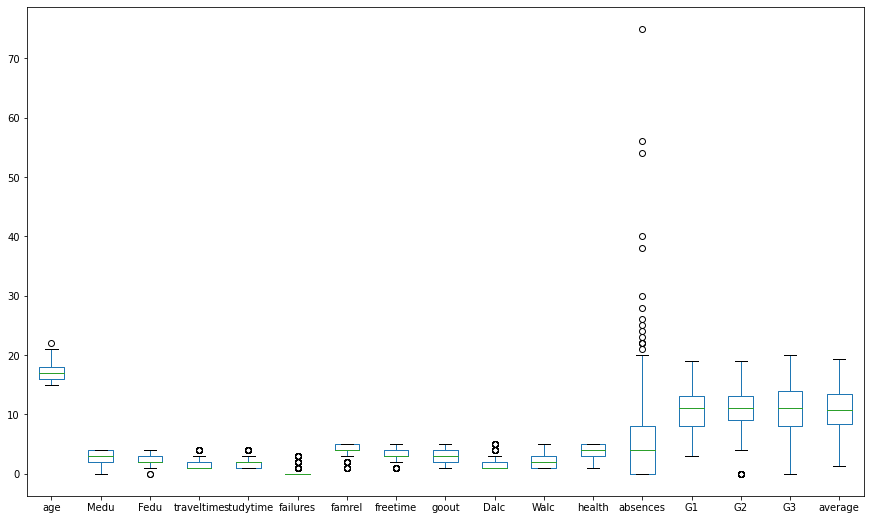

In [19]:
student_data.plot(kind="box",figsize=(15,9));

In [20]:
Q1 = student_data.quantile(0.25)
Q3 = student_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (student_data < (Q1 - 1.5 * IQR)) | (student_data > (Q3 + 1.5 * IQR))

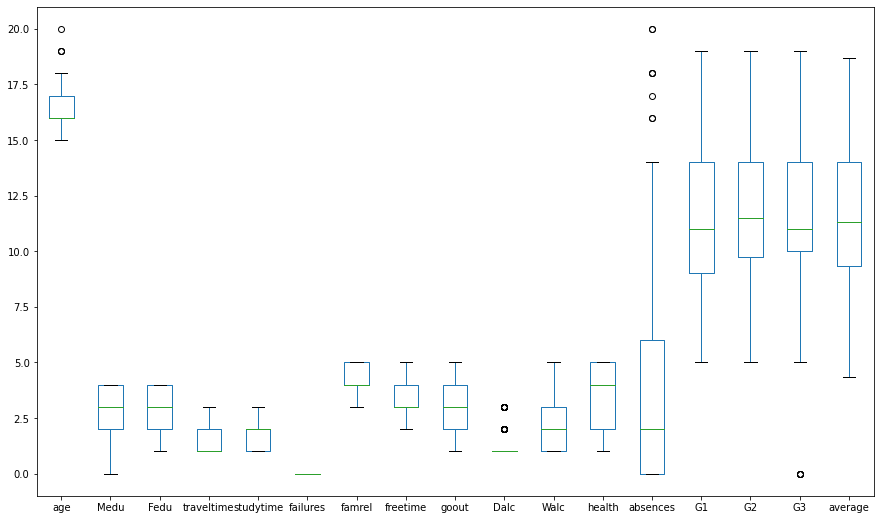

In [21]:
final1 = student_data[~(outliers).any(axis=1)]
final1.plot(kind="box",figsize=(15,9));

In [22]:
Q1 = final1.quantile(0.25)
Q3 = final1.quantile(0.75)
IQR = Q3 - Q1
outliers = (final1 < (Q1 - 1.5 * IQR)) | (final1 > (Q3 + 1.5 * IQR))

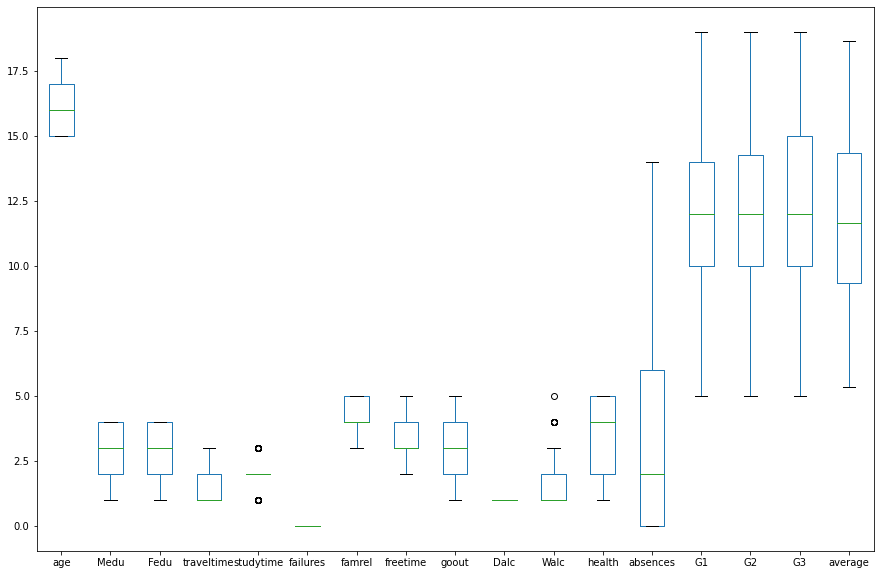

In [23]:
final2 = final1[~(outliers).any(axis=1)]
final2.plot(kind="box",figsize=(15,10))

In [24]:
Q1 = final2.quantile(0.25)
Q3 = final2.quantile(0.75)
IQR = Q3 - Q1
outliers = (final2 < (Q1 - 1.5 * IQR)) | (final2 > (Q3 + 1.5 * IQR))

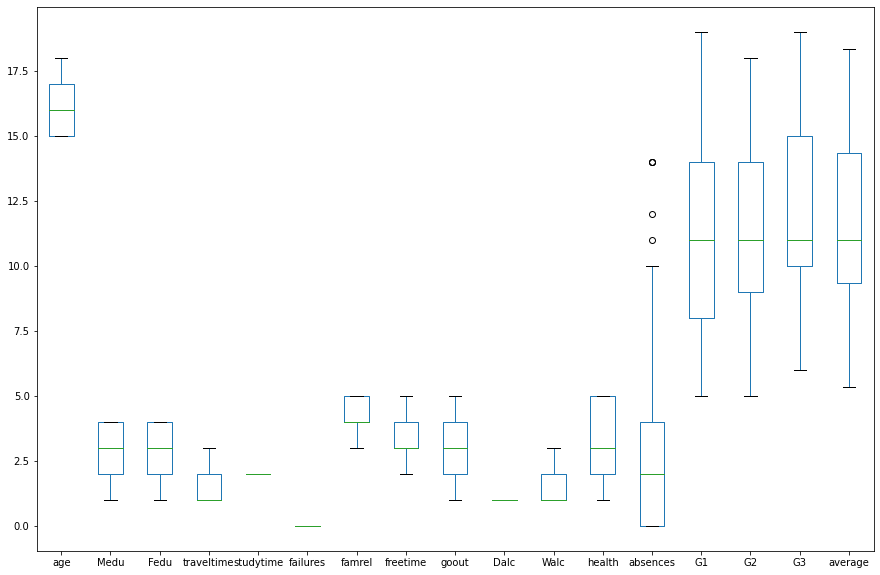

In [25]:
final3 = final2[~(outliers).any(axis=1)]
final3.plot(kind="box",figsize=(15,10))

In [26]:
Q1 = final3.quantile(0.25)
Q3 = final3.quantile(0.75)
IQR = Q3 - Q1
outliers = (final3 < (Q1 - 1.5 * IQR)) | (final3 > (Q3 + 1.5 * IQR))

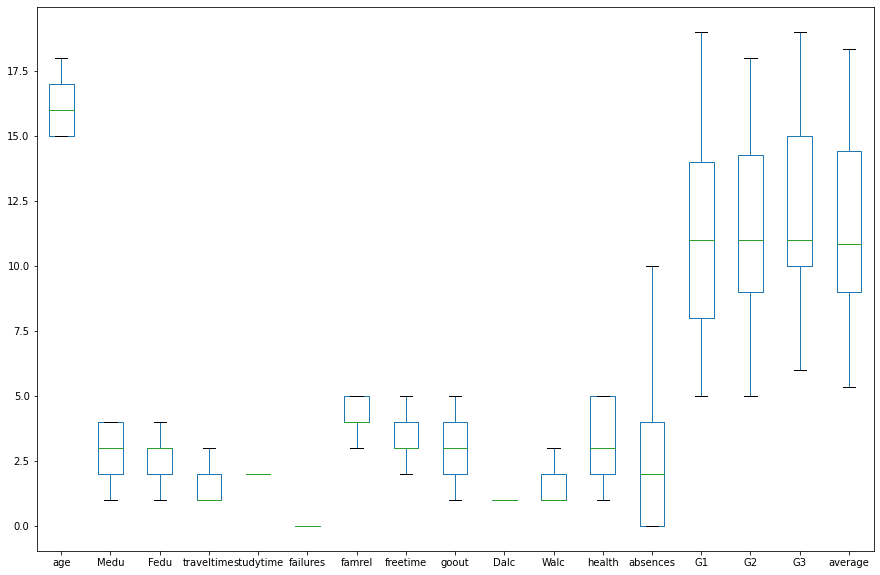

In [27]:
final_data = final3[~(outliers).any(axis=1)]
final_data.plot(kind="box",figsize=(15,10))

In [28]:
final_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,C
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,B
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,15.000000,B
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,11.666667,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,MS,F,17,R,GT3,T,4,4,teacher,services,other,father,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,3,3,1,2,5,4,12,13,13,12.666667,B
362,MS,F,18,U,GT3,T,3,3,services,services,other,mother,2,2,0,no,yes,no,no,yes,yes,yes,yes,4,3,2,1,3,3,0,11,11,10,10.666667,B
364,MS,F,17,R,GT3,T,1,2,other,services,course,father,2,2,0,no,no,no,no,no,yes,no,no,3,2,2,1,2,3,0,12,11,12,11.666667,B
382,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,2,11,11,10,10.666667,B


In [29]:
categorical_columns = []
numerical_columns = []

for col in student_data.columns :
    if student_data[col].dtype == "object":
        categorical_columns.append(col)
    elif (student_data[col].dtype == "int64") | (student_data[col].dtype == "float"):
        numerical_columns.append(col)
        
numerical_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'average']

### Numerical columns
1. Age - students age
2. Medu - mother's education
3. Fedu - father's education
4. Travel time - time of travelling from home to school
5. Study time - time used in studying
6. Failures - number of failures
7. Famrel - family relationship
8. Free time - student's free time
9. Goout - going out
10. Dalc - weekday alcohol consumption
11. Walc - weekend alcohol consumption
12. Health - health status
13. Absences - school absences
14. G1 - first grade
15. G2 - second grade
16. G3 - final grade

In [30]:
for feature in categorical_columns:
    print(feature,"=",student_data[feature].unique())

school = ['GP' 'MS']
sex = ['F' 'M']
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T']
Mjob = ['at_home' 'health' 'other' 'services' 'teacher']
Fjob = ['teacher' 'other' 'services' 'health' 'at_home']
reason = ['course' 'other' 'home' 'reputation']
guardian = ['mother' 'father' 'other']
schoolsup = ['yes' 'no']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['no' 'yes']
romantic = ['no' 'yes']
grades = ['C' 'B' 'A']


### Categorical columns
1. School - Gabriel Pereira(GP) , Mousinho da Silveira(MS)
2. Sex - Female (F), Male (M)
3. Address - Urban (U), Rural (R)
4. Famsize - Family size : Greater than 3, Less than or equal to 3 (LE3)
5. Pstatus - Parent Marital Status : Apart (A), Together(T)
6. Mjob - Mother's job
7. Fjob - Father's job
8. Reason - Reason for choosing the school
9. Guardian - who the guardian is.
10. Schoolsup - School's support
11. Famsup - Family's support
12. Paid - Extra classes
13. Activities - Extra curriculum activities
14. Nursery - Attended nursery school
15. Higher - If they want to take higher education.
16. Internet - Internet access
17. Romantic - In a romantic relationship

### LABEL ENCODING

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label = LabelEncoder()
final_label_data = final_data.copy()

for col in categorical_columns:
    final_label_data[col] = label.fit_transform(final_data[col])
    
final_label_data.head()    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average,grades
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,0,0,0,4,3,4,1,1,3,6,5,6,6,5.666667,2
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,0,1,0,5,3,3,1,1,3,4,5,5,6,5.333333,2
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,0,0,0,4,3,2,1,2,5,4,6,10,10,8.666667,1
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,0,1,0,5,4,2,1,2,5,10,15,15,15,15.000000,1
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,0,1,0,4,4,4,1,1,3,0,12,12,11,11.666667,1


In [33]:
final_label_data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average,grades
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.0,80.000000,80.00000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.087500,0.425000,16.212500,0.900000,0.33750,0.862500,2.800000,2.612500,2.262500,2.312500,1.300000,0.787500,1.325000,2.0,0.0,0.150000,0.67500,0.537500,0.537500,0.812500,0.0,0.837500,0.262500,4.275000,3.325000,3.025000,1.0,1.57500,3.312500,2.937500,11.187500,11.412500,11.662500,11.420833,0.987500
std,0.284349,0.497462,1.027394,0.301893,0.47584,0.346547,1.095445,1.037204,1.219501,0.804949,1.296539,0.469143,0.545987,0.0,0.0,0.359324,0.47133,0.501737,0.501737,0.392775,0.0,0.371236,0.442769,0.594809,0.838549,1.030853,0.0,0.75933,1.539306,3.057855,3.202427,3.092227,3.170049,3.070088,0.515427
min,0.000000,0.000000,15.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,2.000000,1.000000,1.0,1.00000,1.000000,0.000000,5.000000,5.000000,6.000000,5.333333,0.000000
25%,0.000000,0.000000,15.000000,1.000000,0.00000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.0,0.0,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,4.000000,3.000000,2.000000,1.0,1.00000,2.000000,0.000000,8.000000,9.000000,10.000000,9.000000,1.000000
50%,0.000000,0.000000,16.000000,1.000000,0.00000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.0,0.0,0.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,4.000000,3.000000,3.000000,1.0,1.00000,3.000000,2.000000,11.000000,11.000000,11.000000,10.833333,1.000000
75%,0.000000,1.000000,17.000000,1.000000,1.00000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.0,0.0,0.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,5.000000,4.000000,4.000000,1.0,2.00000,5.000000,4.000000,14.000000,14.250000,15.000000,14.416667,1.000000
max,1.000000,1.000000,18.000000,1.000000,1.00000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.0,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,5.000000,5.000000,5.000000,1.0,3.00000,5.000000,10.000000,19.000000,18.000000,19.000000,18.333333,2.000000


# BUILDING MODEL

## Importing modules 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_absolute_error

In [35]:
X_features = ["school", "sex", "age", "address", "famsize", "Medu", "Fedu", "traveltime", "studytime", "famsup", "activities", "higher", "romantic", "famrel", "freetime"]
X = final_label_data[X_features]

In [36]:
y_features = ["grades"]
y = final_label_data[y_features]
y

,grades
0,2
1,2
4,1
5,1
6,1
...,...
356,1
362,1
364,1
382,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
classifiers = {
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree Classifier': tree.DecisionTreeClassifier(random_state=1),
    
    'SVM': SVC(random_state=1),
    'Naive Bayes': GaussianNB(),
}

accuracies = []
means = []
for key, clf in classifiers.items() :
    
    clf.fit(X_train, y_train.values.ravel())
    prediction = clf.predict(X_test)
    
    accuracy = accuracy_score(prediction, y_test)
    accuracies.append(accuracy)
    print("The accuracy of ", key, "is ",accuracy)
    
    MEA = mean_absolute_error(prediction, y_test)
    means.append(MEA)
    print("The MEA of ", key, "is ",MEA)

The accuracy of  K Nearest Neighbors is  0.8
The MEA of  K Nearest Neighbors is  0.2
The accuracy of  Decision Tree Classifier is  0.6
The MEA of  Decision Tree Classifier is  0.4
The accuracy of  SVM is  0.95
The MEA of  SVM is  0.05
The accuracy of  Naive Bayes is  0.1
The MEA of  Naive Bayes is  0.95


In [39]:
indexes = ["K Nearest Neighbors", "Decision Tree Classifier", "SVM", "Naive Bayes"]
data = accuracies
performance = pd.DataFrame(data=data, index=indexes, columns=["accuracy"])
performance["MEA"] = means
performance

,accuracy,MEA
K Nearest Neighbors,0.80,0.20
Decision Tree Classifier,0.60,0.40
SVM,0.95,0.05
Naive Bayes,0.10,0.95


In [40]:
model = classifiers.get("K Nearest Neighbors")

prediction = model.predict(X)
prediction

array([2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [42]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [43]:
import streamlit

In [44]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()

  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(school, sex, age, address, famsize, Medu, Fedu, traveltime, studytime, famsup, activities, higher, romantic, famrel, freetime):   
 
    # Pre-processing user input    
    if school == "GP":
        school = 0
    else:
        school = 1
 
    if sex == "F":
        sex = 0
    else:
        sex = 1

    if address == "U":
        address = 0
    else:
        address = 1  

    if famsize == "GT3":
        famsize = 0
    else:
        famsize = 1 

    if famsup == "no":
        famsup = 0
    else:
        famsup = 1

    if activities == "no":
        activities = 0
    else:
        activities = 1  

    if higher == "yes":
        higher = 0
    else:
        higher = 1

    if romantic == "no":
        romantic = 0
    else:
        romantic = 1
  
    # Making predictions 
    prediction = classifier.predict( 
        [[school, sex, age, address, famsize, Medu, Fedu, traveltime, studytime, famsup, activities, higher, romantic, famrel, freetime]])
     
    if prediction == 0:
      pred = 'A'
    elif prediction == 1:
      pred = 'B'
    else:
      pred = 'C'

    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Student grade prediction web app</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    school = st.selectbox('School',("GP","MS"))
    sex = st.selectbox('Gender',("Male","Female")) 
    age = st.number_input("Age")
    address = st.selectbox('Address',("Urban","Rural")) 
    famsize = st.selectbox('Family size',("GT3", "LE3"))
    Medu =st.number_input("Mother's education")
    Fedu =st.number_input("Father's education")
    traveltime = st.number_input("traveltime")
    studytime = st.number_input("studytime")
    famsup = st.selectbox('Family support',("yes","no"))
    activities = st.selectbox('activities',("no","yes"))
    higher = st.selectbox('Higher education',("no","yes"))
    romantic = st.selectbox('Romantic relationship',("no","yes"))
    famrel = st.number_input("Familyrelationship")
    freetime = st.number_input("Free time")
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(school, sex, age, address, famsize, Medu, Fedu, traveltime, studytime, famsup, activities, higher, romantic, famrel, freetime) 
        st.success('Your grade is {}'.format(result))
      
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [1]:
!streamlit run app.py &>/dev/null&

OSError: Background processes not supported.

In [46]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-05-21 19:56:50.918 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-451a5e4e-64ac-4775-8800-aaf16dfc574d
2021-05-21 19:56:50.980 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:50+0000 lvl=info msg="no configuration paths supplied"
2021-05-21 19:56:50.990 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:50+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-05-21 19:56:50.996 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:50+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-05-21 19:56:51.001 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:50+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-05-21 19:56:51.151 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:51+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-05-21 19:56:51.158 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:51+0000 lvl=info msg="client session established" obj=csess id=e0bbe0ed478e

<NgrokTunnel: "http://86ac13a6bdae.ngrok.io" -> "http://localhost:8501">

2021-05-21 19:56:51.262 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:51+0000 lvl=info msg=start pg="/api/tunnels/http-8501-451a5e4e-64ac-4775-8800-aaf16dfc574d (http)" id=1b4f21f4d7c8b625
2021-05-21 19:56:51.266 INFO    pyngrok.process.ngrok: t=2021-05-21T19:56:51+0000 lvl=info msg=end pg="/api/tunnels/http-8501-451a5e4e-64ac-4775-8800-aaf16dfc574d (http)" id=1b4f21f4d7c8b625 status=200 dur=165.79µs
